                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Tue, 11 Mar 2025   AIC                           1390.135
Time:                        15:06:52   BIC                           1407.912
Sample:                             0   HQIC                          1397.358
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

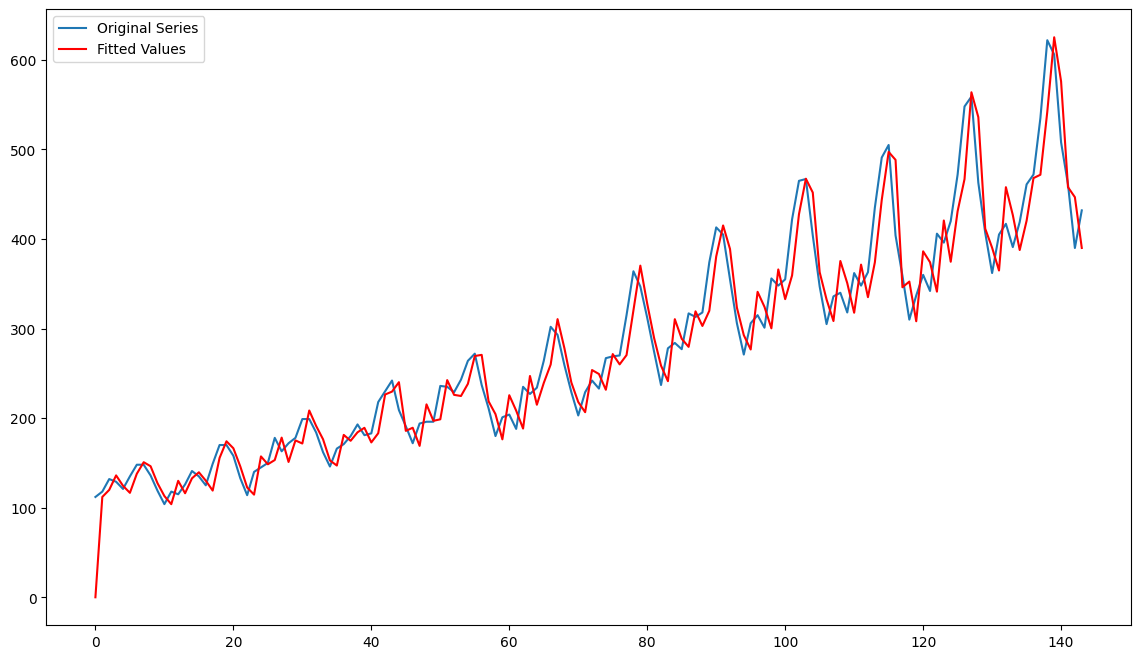

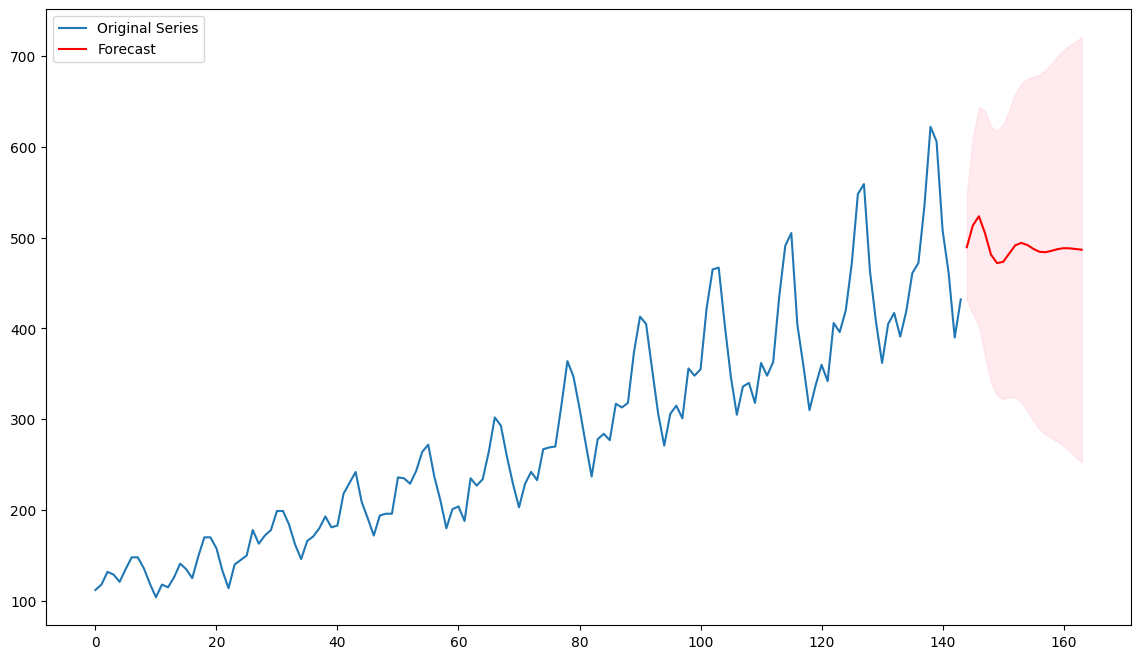

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Загружаем данные
series = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/international-airline-passengers.csv")['Count']
series = series.dropna()  # Удаляем пропущенные значения

# Настройка и подгонка модели ARIMA
order = (5, 1, 0)  # Параметры модели ARIMA (p, d, q)
model = sm.tsa.ARIMA(series, order=order)
results = model.fit()

# Вывод результатов
print(results.summary())

# Построение графика предсказаний
plt.figure(figsize=(14, 8))
plt.plot(series, label='Original Series')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.show()

# Прогнозирование будущих значений
forecast_steps = 20
forecast_results = results.get_forecast(steps=forecast_steps)
forecast = forecast_results.summary_frame()['mean']
conf_int = forecast_results.conf_int()

# Построение графика прогноза
plt.figure(figsize=(14, 8))
plt.plot(series, label='Original Series')
plt.plot(np.arange(len(series), len(series) + forecast_steps), forecast, color='red', label='Forecast')
plt.fill_between(np.arange(len(series), len(series) + forecast_steps), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()
